In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [3]:
import warnings
warnings.filterwarnings(action='ignore') 

In [6]:
from sklearn.datasets import fetch_lfw_people
# 유명한 사람들의 인물 사진을 갖고있는 내장데이터(최소 사진이 70장이상 있는 사람만)
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [13]:
x = faces.data
y = faces.target
target_names = faces.target_names

In [14]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [12]:
pd.Series(y).value_counts()

3    530
1    236
6    144
2    121
4    109
0     77
5     71
dtype: int64

In [15]:
x.shape   # column이 1850개인 고차원데이터

(1288, 1850)

In [17]:
x[0].reshape(50,37)

array([[254.      , 254.      , 251.66667 , ...,  65.333336,  50.666668,
         40.333332],
       [253.33333 , 251.33333 , 247.33333 , ...,  66.666664,  52.      ,
         42.666668],
       [240.66667 , 231.66667 , 211.66667 , ...,  62.      ,  49.      ,
         42.      ],
       ...,
       [ 74.333336,  54.      ,  31.666666, ...,  97.666664,  93.      ,
         90.      ],
       [ 65.333336,  47.      ,  30.333334, ...,  91.666664,  92.      ,
         86.333336],
       [ 59.333332,  44.333332,  32.333332, ...,  87.333336,  88.666664,
         86.666664]], dtype=float32)

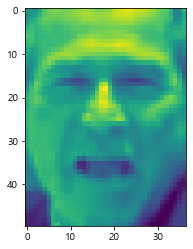

In [20]:
plt.imshow(x[10].reshape(50,37))

In [24]:
n_samples, h, w = x.reshape(1288,50,37).shape   # 이미지수(데이터수), row 수, cloumn 수

In [25]:
# 전체는 많음, 10개의 데이터만 뽑아서
samples = x[:10].reshape(10, h, w)
samples

array([[[254.      , 254.      , 251.66667 , ...,  65.333336,
          50.666668,  40.333332],
        [253.33333 , 251.33333 , 247.33333 , ...,  66.666664,
          52.      ,  42.666668],
        [240.66667 , 231.66667 , 211.66667 , ...,  62.      ,
          49.      ,  42.      ],
        ...,
        [ 74.333336,  54.      ,  31.666666, ...,  97.666664,
          93.      ,  90.      ],
        [ 65.333336,  47.      ,  30.333334, ...,  91.666664,
          92.      ,  86.333336],
        [ 59.333332,  44.333332,  32.333332, ...,  87.333336,
          88.666664,  86.666664]],

       [[ 39.666668,  50.333332,  47.      , ...,  61.333332,
          51.      ,  38.666668],
        [ 47.666668,  63.      ,  65.333336, ...,  57.666668,
          55.      ,  44.666668],
        [ 55.333332,  76.666664,  86.333336, ...,  71.      ,
          48.333332,  43.666668],
        ...,
        [ 73.666664,  75.666664,  75.333336, ..., 125.666664,
         119.666664, 115.333336],
        [ 75

In [26]:
samples.shape

(10, 50, 37)

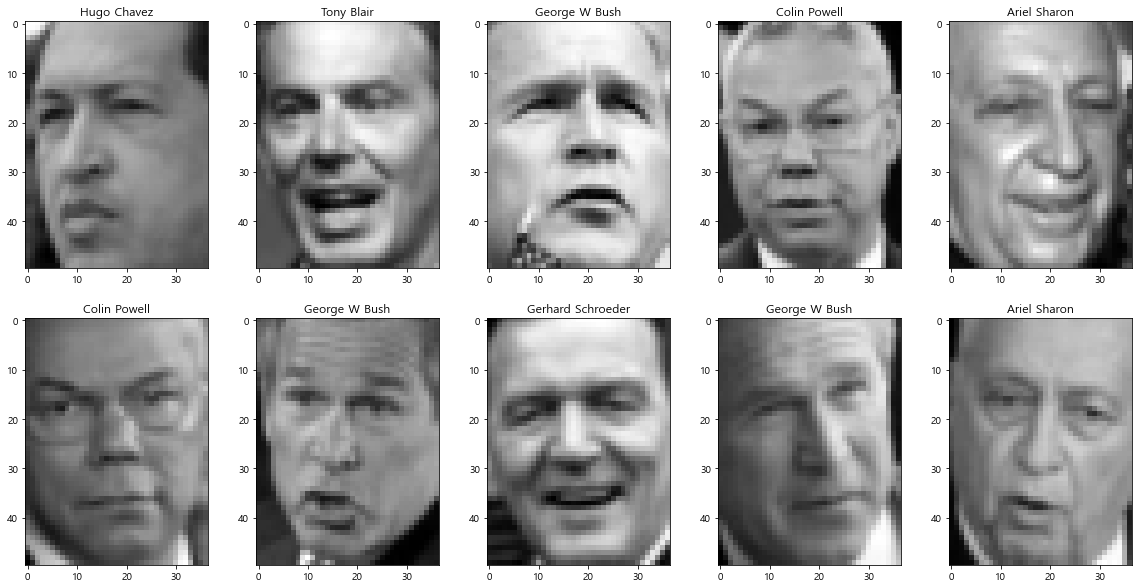

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap='gray')
    ax.set_title(target_names[y[idx]])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111, test_size=0.2)

In [35]:
# 데이터간의 편차가 크다
x_train

array([[ 75.333336 ,  80.       ,  71.333336 , ..., 198.66667  ,
        208.66667  , 118.       ],
       [ 80.       ,  85.       , 100.333336 , ...,  49.       ,
         47.333332 ,  50.333332 ],
       [ 29.       ,  47.333332 ,  79.       , ...,  75.333336 ,
         78.333336 ,  77.333336 ],
       ...,
       [  5.6666665,   4.3333335,   7.6666665, ..., 114.333336 ,
        117.333336 , 124.666664 ],
       [ 58.       ,  66.666664 ,  76.666664 , ..., 115.       ,
        140.33333  , 210.33333  ],
       [185.       , 173.66667  , 153.66667  , ..., 125.333336 ,
        122.666664 ,  54.       ]], dtype=float32)

In [40]:
# 데이터 정규화, (StandardScaler, MinMaxScaler) 둘 중에 아무거나 사용
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
# 학습을 시키고
scaler.fit(x_train)
# 학습시킨 데이터 변환
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [44]:
x_train_scaled.shape

(1030, 1850)

In [45]:
x_test_scaled.shape

(258, 1850)

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train_scaled, y_train)
rfc.score(x_test_scaled, y_test)

0.6356589147286822

In [46]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_scaled, y_train)
svc.score(x_test_scaled, y_test)

0.7751937984496124

In [47]:
# PCA Decomposition

In [50]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_scaled)

PCA()

In [53]:
pca.n_components_

1030

In [54]:
pca = PCA(n_components=0.9)
pca.fit(x_train_scaled)

PCA(n_components=0.9)

In [55]:
# 전체의 90%를 볼 경우 차원이 1030에서 75로 줄어든다.
pca.n_components_

75

In [56]:
x_train_scaled_pca = pca.transform(x_train_scaled)
x_test_scaled_pca = pca.transform(x_test_scaled)

In [57]:
# 정확도가 약간 상승
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train_scaled_pca, y_train)
rfc.score(x_test_scaled_pca, y_test)

0.6434108527131783

In [58]:
# 정확도가 약간 상승
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_scaled_pca, y_train)
svc.score(x_test_scaled_pca, y_test)

0.7790697674418605

In [60]:
pca.components_.shape

(75, 1850)

In [61]:
# 차원축소한 이미지 출력
eigenfaces = pca.components_.reshape((pca.n_components_, h, w))
samples = eigenfaces[:10].reshape(10, h, w)

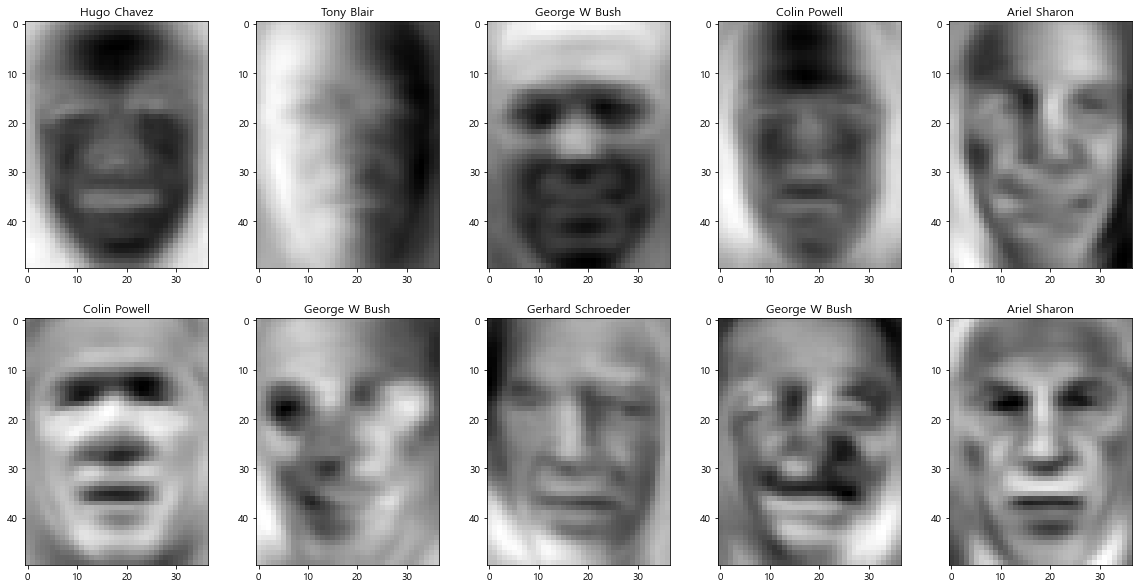

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap='gray')
    ax.set_title(target_names[y[idx]])